In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../data/raw/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Train Test Split

In [4]:
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Scaling the data

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [7]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the model

In [8]:
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


## Model Prediction

In [9]:
y_pred = lr.predict(X_test_scaled)

## Accuracy

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 85.19%


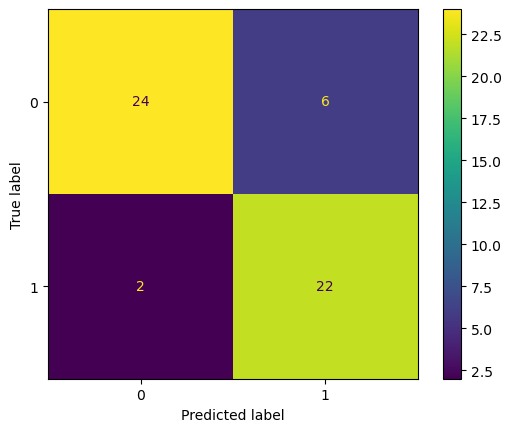

In [11]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Classification Report

In [12]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     Absence       0.92      0.80      0.86        30
    Presence       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



## Effect of Feature Scaling

**Convergence Warning**: The convergence warning, which appeared in the baseline model, is now disapperared as after using `StandardScaler` the features are now on the same scale.

**Accuracy before scaling**: 83.33%

**Accuracy after scaling**: 85.19%

**Precision / Recall changes**: The Precision for Class 0 improved from 0.89 to 0.92, and the Recall for Class 1 saw a significant jump from 0.88 to 0.92, indicating that the model is now better at capturing positive instances without sacrificing accuracy.

**Interpretation**: After feature scaling, the Logistic Regression model converges properly without warnings, indicating improved optimization stability. While overall accuracy changes are marginal, the recall for the positive class (heart disease presence) improves, which is critical in a medical diagnosis setting. This suggests that scaling helps the model learn more balanced decision boundaries and reduces the risk of missing positive cases, making it more suitable for this problem despite similar accuracy.
